In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
df=pd.read_csv(r'E:\Data Analyst Bootcamp\python-projects\titanic-eda\data\train.csv')

explore the data

In [129]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [130]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [131]:
df.isnull().sum()
# age_null=177
# cabin_null=687
# embrked_null=2

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [132]:
pd.set_option('display.float_format','{:.2f}'.format)

In [133]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


clean the data

In [134]:
df["Survived"]=df["Survived"].apply(lambda x:'Yes' if x==1 else 'No')

In [135]:
df['Age']=df['Age'].apply(lambda x:
                        np.mean(df['Age'] )
                        if pd.isna(x)
                        else x)

In [136]:
df['Cabin'].fillna('Unknown',inplace=True)

In [137]:
df['Embarked'].mode()
df['Embarked'].fillna('S',inplace=True)

In [138]:
df['Embarked']=df['Embarked'].str.replace('Cherbourgherbourgherbourg','Cherbourg')
df['Embarked']=df['Embarked'].str.replace('C','Cherbourg')
df['Embarked']=df['Embarked'].str.replace('Q','Queenstown')
df['Embarked']=df['Embarked'].str.replace('S','Southampton')


In [139]:
# int(np.mean(df['Age']))
# np.std(df['Age'])
# np.mean(df['Fare'])

In [140]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,Unknown,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,Unknown,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,Unknown,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,Unknown,Southampton
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,Southampton
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.70,1,2,W./C. 6607,23.45,Unknown,Southampton
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,Cherbourg


visuals

Text(0, 0.5, 'Survival rate')

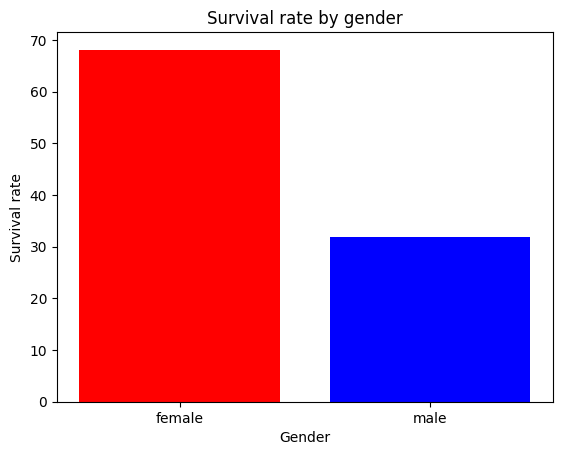

In [141]:
countOfSurvived=df[df['Survived']=='Yes'].groupby('Sex')['Sex'].count()
plt.bar(countOfSurvived.index,countOfSurvived/sum(countOfSurvived)*100,
        color=['blue' if x=='male'
                else 'red' for x in countOfSurvived.index]
        
        )
plt.title('Survival rate by gender')
plt.xlabel('Gender')
plt.ylabel('Survival rate')


Most survivors were women

Text(0.5, 1.0, 'Age Distribution of Passengers')

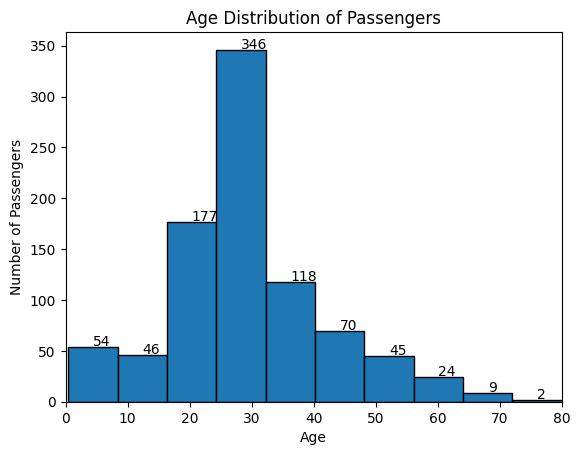

In [142]:
Ages=df['Age']
counts ,bin_edges=np.histogram(Ages,bins=10)
plt.hist(Ages,
         bins=10,
         edgecolor='#000')
for i in range (len(counts)):
    plt.text(
        x=(bin_edges[i]+bin_edges[i+1])/2,
        y=counts[i]+1,
        s=str(counts[i])

    )
plt.xlim(0, 80)

plt.xticks(range(0,81,10))
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Passengers')


The passenger population was highly concentrated around the age of 30, indicating that young adults formed the core demographic of Titanic travelers.

([<matplotlib.patches.Wedge at 0x25b973f2fd0>,
 [Text(-0.7144666156445052, 0.8363835574241564, 'Southampton'),
  Text(0.4640008595430119, -0.9973480848446777, 'Cherbourg'),
  Text(1.05970797154395, -0.29498985583610726, 'Queenstown')],
 [Text(-0.38970906307882097, 0.4562092131404488, '72.5%'),
  Text(0.25309137793255193, -0.5440080462789151, '18.9%'),
  Text(0.5780225299330635, -0.16090355772878576, '8.6%')])

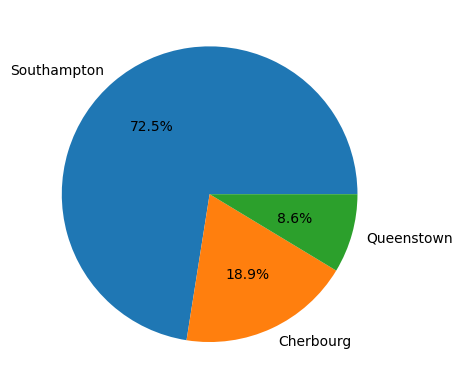

In [143]:
embarked=df['Embarked'].value_counts()
plt.pie(embarked,labels=embarked.index,
        autopct='%1.1f%%')



The data indicates that the majority of passengers embarked from Queenstown, Ireland, suggesting that it was a major departure point for Titanic travelers.

Text(0, 0.5, 'Fare')

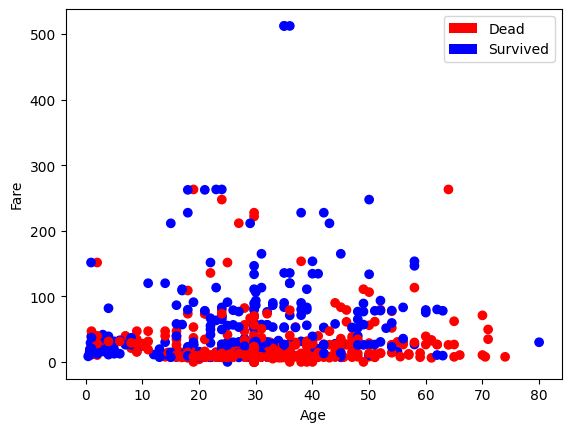

In [144]:
from matplotlib.patches import Patch
survived = np.array(df['Survived'])
plt.scatter(df['Age'], df['Fare'],
            color=['red' if x == 'No' else 'blue' for x in survived])
legend_elements = [Patch(facecolor='red', label='Dead'),
                   Patch(facecolor='blue', label='Survived')]
plt.legend(handles=legend_elements)
plt.xlabel('Age')
plt.ylabel('Fare')






Survival is not guaranteed for any age or fare.

In [145]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,Unknown,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,Unknown,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,Unknown,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,Unknown,Southampton
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,Southampton
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.70,1,2,W./C. 6607,23.45,Unknown,Southampton
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,Cherbourg
